# Predicting Health Insurance Price for an individual or family






### Introduction
The majority of nations determine health insurance premiums based on a variety of variables, including age, the size of families, etc. Many companies struggle with determining what the true cost of health insurance for a single person or family should be.

### Aim: 
- Performing Exploratory Data Analysis to find hidden insights. 
- Performing necessay feature engineering to get better predictions.
- To find the best machine learning model for predicting the health insurance price.

### Variables in the given dataset:

age: age of the primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

children: number of children covered by health insurance, number of dependents

smoker: smoking or not

region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

charges: individual medical costs billed by health insurance

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as no

In [2]:
# Reading the given dataset 
hi = pd.read_excel('/content/Health_insurance_cost- Mandatory project.xlsx')
hi.head(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [3]:
# To know about basic information of the dataset.
hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [4]:
# To see few statistical measures of the given data
hi.describe(include= 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [5]:
# Checking for percentage of null values
hi.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

#### Dropping the null values

In [6]:
# Dropping the rows having null values
hi  = hi.dropna(axis= 0, subset= ['age', 'BMI', 'health_insurance_price'])

In [7]:
# To find number of unique values in all the columns
hi.nunique()

age                         47
gender                       2
BMI                        541
Children                     6
smoking_status               2
location                     4
health_insurance_price    1284
dtype: int64

#### Examining the distribution of all variables


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

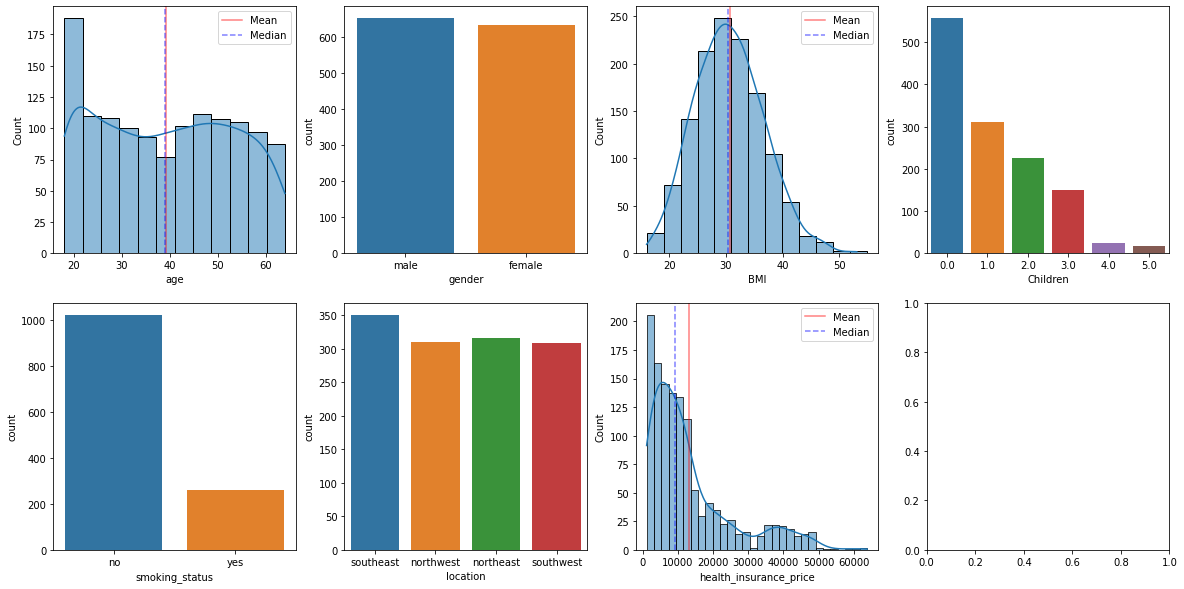

In [8]:
# Examining the distribution of all variables
plt.figure(figsize = (20, 10))

sns.histplot(data = hi['age'], kde = True)
plt.axvline(x= hi['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,1)

sns.histplot(data = hi['age'], kde = True)
plt.axvline(x= hi['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,2)

sns.countplot(hi['gender'])
plt.subplot(2,4,3)

sns.histplot(data = hi['BMI'], kde = True, binwidth = 3)
plt.axvline(x= hi['BMI'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['BMI'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,4)

sns.countplot(hi['Children'])
plt.subplot(2,4,5)

sns.countplot(hi['smoking_status'])
plt.subplot(2,4,6)

sns.countplot(hi['location'])
plt.subplot(2,4,7)

sns.histplot(data = hi['health_insurance_price'], kde = True)
plt.axvline(x= hi['health_insurance_price'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['health_insurance_price'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,8)

plt.show()

In [9]:
# To get static image in plotly
import plotly.io as pio
pio.renderers.default= 'png'

#!pip install --upgrade "kaleido==0.1.*"
# now Restart runtime 

## EDA

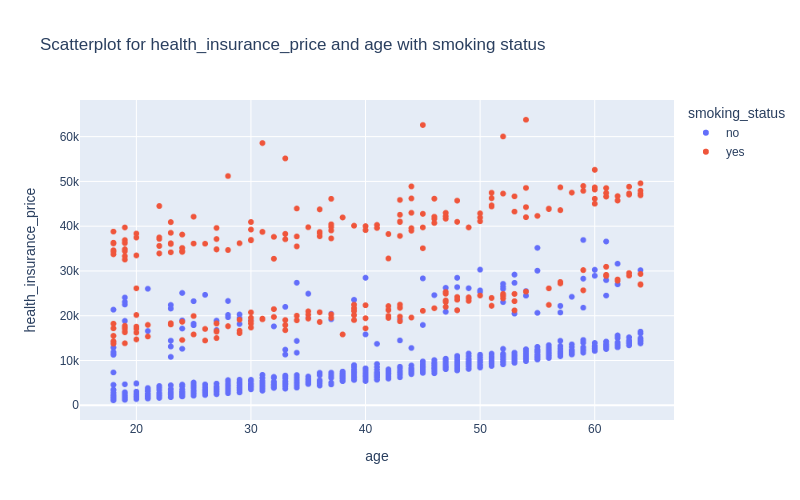

In [10]:
# To observe relation between age and health_insurance_price
px.scatter(hi, x= 'age', y= "health_insurance_price", color= "smoking_status",  
           title= "Scatterplot for health_insurance_price and age with smoking status", width= 800, height= 00)

**Obs:** 

**1)** With an increase in age , there's an increase in the insurace price. 

**2)** People with smoking_staus = yes are having higher health insurance price

**3)** We can observe 3 categories in health_insurance_price with more number of people below 15k

Discretizing health insurance price column into 3 categories as **price_category** - less than 15k, 15k - 30k, more than 30k

In [11]:
hi['price_category'] =  pd.cut(x= hi['health_insurance_price'], bins=[1, 15000, 30000, 100000],
                    labels=['less_than_15k', '15k_30k', 'More_than_30k'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Distribution of price_category')]

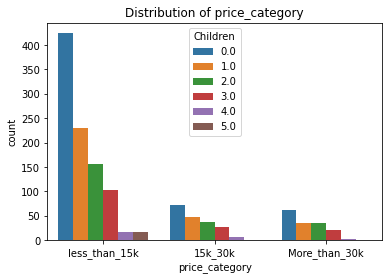

In [12]:
# To plot distribution of price_category
sns.countplot(hi['price_category'], hue= hi['Children']).set(title= 'Distribution of price_category')

**Obs:**

Most of the **people with no children** fall under category health_insurance_price less than 15k

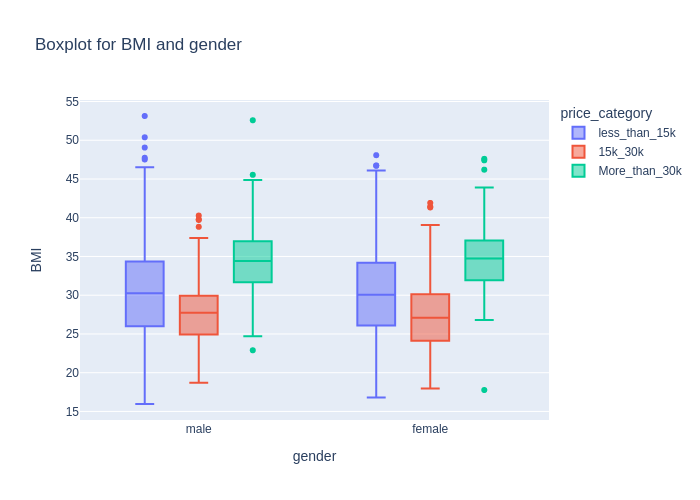

In [13]:
# To plot boxplot
px.box(hi, x= 'gender', y= 'BMI', color= 'price_category', title= 'Boxplot for BMI and gender', height= 500)

**Obs:**
Health_insurance_price greater than 30k consists of Obese people(BMI > 30)

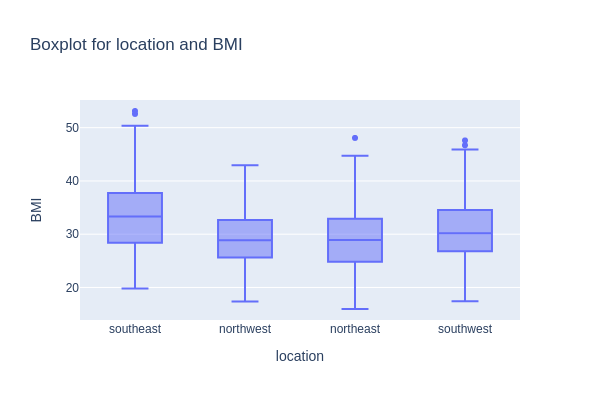

In [14]:
# To plot boxplot
px.box(hi, x= 'location', y= 'BMI', title= 'Boxplot for location and BMI', height= 400, width = 600)

**Obs:** More number of obese people are found in location southeast. 

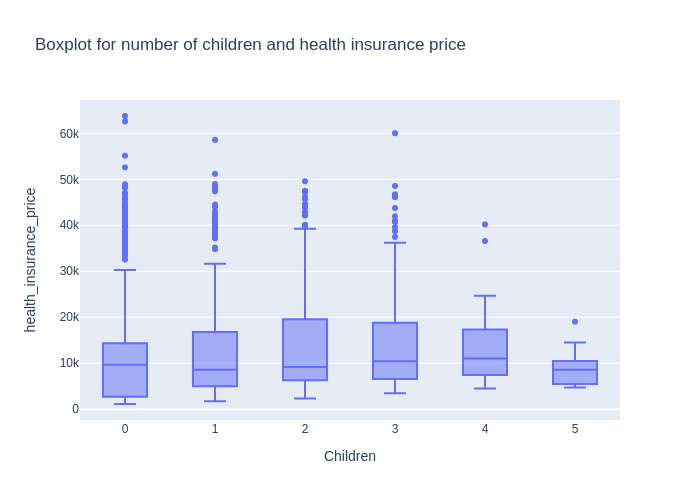

In [15]:
# To plot boxplot
px.box(hi, x= 'Children', y= 'health_insurance_price', title= 'Boxplot for number of children and health insurance price',
       height= 500)

**Obs:** People having children are having slightly more health insurance price.

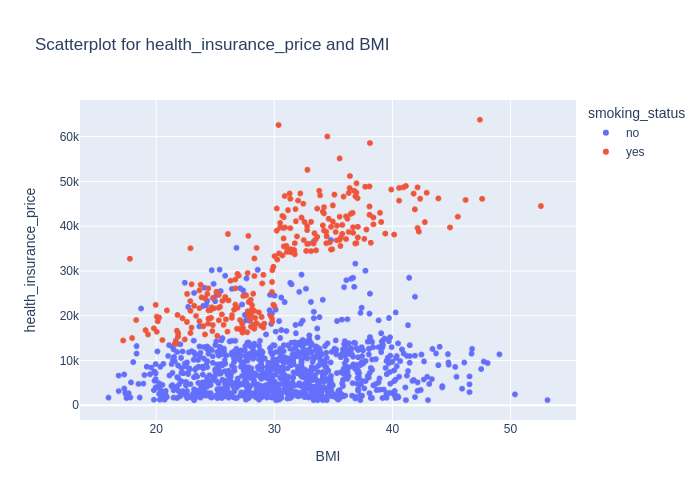

In [16]:
# To plot scatter plot
px.scatter(hi, x= 'BMI', y= 'health_insurance_price', color= 'smoking_status', 
           title= 'Scatterplot for health_insurance_price and BMI', height= 500)

**EDA Conclusion:**

1) People whose smoking_status = yes and Obese are having high health insurance price (greater than 30k).

2) Increase in age results in increase in health insurance price.

3) People without children likely to have less health insurance price(less than 15k) compared to others. 

4) Southeast location has more obese people compared to other location.

## Feature engineering

In [17]:
# Converting children category to children_or_not (yes or no) 
hi['Children'] = hi['Children'].astype('int')

hi['Having_Children'] = np.where(hi['Children'] == 0, 'No', 'Yes')

In [18]:
# To drop the price_category column, Children(number of children)
hi = hi.drop(['price_category', 'Children'], axis= 1)

hi['gender'] = hi['gender'].astype('category')
hi['smoking_status'] = hi['smoking_status'].astype('category')
hi['location'] = hi['location'].astype('category')
hi['age'] = hi['age'].astype('int')
hi['Having_Children'] = hi['Having_Children'].astype('category')

# To view basic information 
hi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 1 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     1285 non-null   int64   
 1   gender                  1285 non-null   category
 2   BMI                     1285 non-null   float64 
 3   smoking_status          1285 non-null   category
 4   location                1285 non-null   category
 5   health_insurance_price  1285 non-null   float64 
 6   Having_Children         1285 non-null   category
dtypes: category(4), float64(2), int64(1)
memory usage: 78.0 KB


**Categorical variables:** Nominal(gender, smoking_status, location)

**Numerical variables:** Discrete(age, Children - number of children) , Continous(health_insurance_price)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



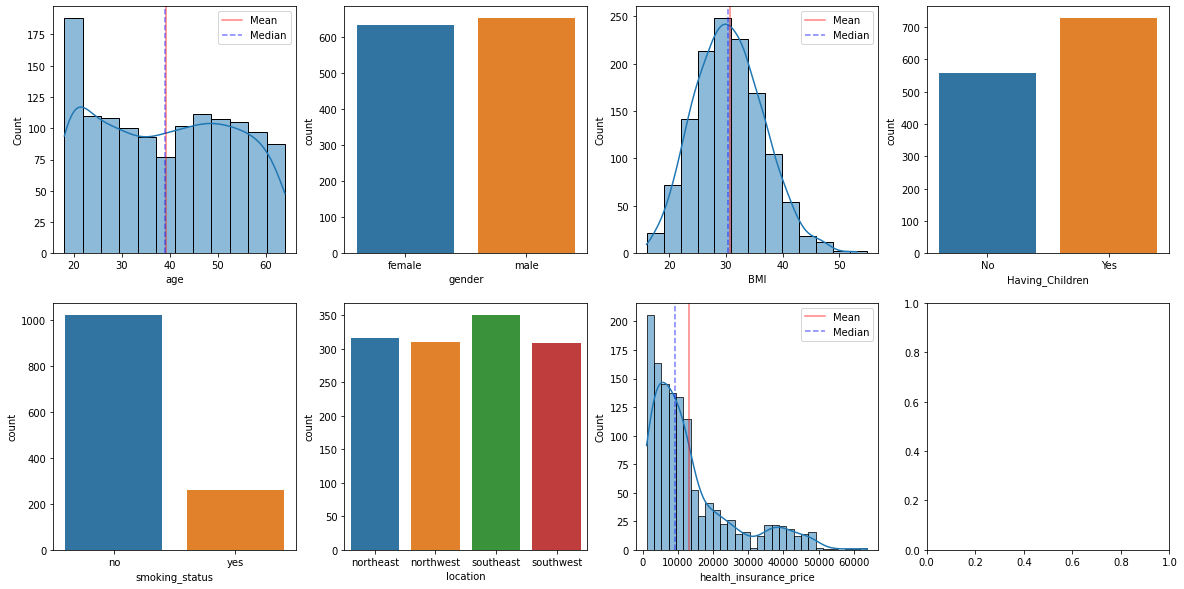

In [19]:
# Examining the distribution of all variables
plt.figure(figsize = (20, 10))

sns.histplot(data = hi['age'], kde = True)
plt.axvline(x= hi['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,1)

sns.histplot(data = hi['age'], kde = True)
plt.axvline(x= hi['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,2)

sns.countplot(hi['gender'])
plt.subplot(2,4,3)

sns.histplot(data = hi['BMI'], kde = True, binwidth = 3)
plt.axvline(x= hi['BMI'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['BMI'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,4)

sns.countplot(hi['Having_Children'])
plt.subplot(2,4,5)

sns.countplot(hi['smoking_status'])
plt.subplot(2,4,6)

sns.countplot(hi['location'])
plt.subplot(2,4,7)

sns.histplot(data = hi['health_insurance_price'], kde = True)
plt.axvline(x= hi['health_insurance_price'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= hi['health_insurance_price'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,8)

plt.show()

1) No extreme outliers.

2) Numerical variables(features) - age and bmi are on same scale but number of children is in small scale.

3) Missing values are less than 2%. Hence they are dropped earlier.

In [20]:
# splitting categorical and numerical data
X_cat = hi[['gender', 'smoking_status', 'location', 'Having_Children']]
X_num = hi.drop(['gender', 'smoking_status', 'location', 'Having_Children'], axis= 1)

#### Correlation  
Discrete variable should not be used in spearman and pearson correlation, so correlation is performed only on BMI and target but not on **Age**.


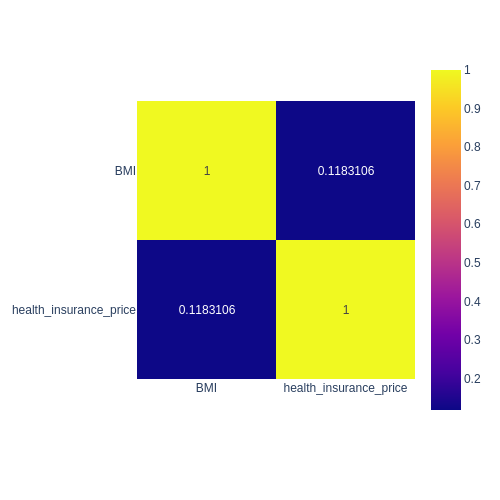

In [21]:
# Checking the correlation of numerical features with the target variable(health_insurance_price)
fig = px.imshow(hi[["BMI", 'health_insurance_price']].corr('spearman'), text_auto=True,
                width = 500, height= 500)
fig.show()

#### chi squared test
To see relation(correlation) between **categorical features**.

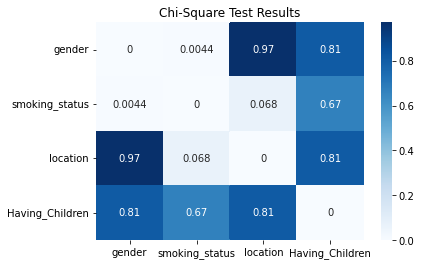

In [22]:
from scipy.stats import chi2_contingency

# list of categorical variables
l = ['gender', 'smoking_status', 'location', 'Having_Children']

p = pd.DataFrame(data=0, columns= l, index= l)
ch = pd.DataFrame(data=0, columns= l, index= l)

for i in l:
  for j in l:
    if i != j:
      ct_table_ind = pd.crosstab( hi[i], hi[j])
      chi2_stat, p_val, dof, expected = chi2_contingency(ct_table_ind)
      p.loc[i,j] = p_val
      ch.loc[i,j] = chi2_stat 

# Plotting a heatmap
fig = plt.figure(figsize=(6,4))
sns.heatmap(p, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

**p < 0.05 - indicates there is relationship. For gender, smoking_status there is a relationship.**

#### kendall test
To find relation between **categorical and numerical variable**.

Kendall Rank correlation, p value for gender : 0.01248 , 0.58405
Kendall Rank correlation, p value for smoking_status : 0.54264 , 0.00000
Kendall Rank correlation, p value for location : -0.03057 , 0.14192
Kendall Rank correlation, p value for Having_Children : 0.09259 , 0.00005


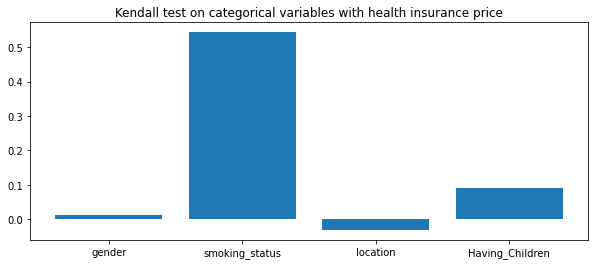

In [23]:
# Import required libraries
from scipy.stats import kendalltau

# list of categorical variables
l = ['gender', 'smoking_status', 'location', 'Having_Children']
Y = hi['health_insurance_price']

lt = []

for i in l:
  X = hi[i]
  corr, pval = kendalltau(X, Y)
  print('Kendall Rank correlation, p value for %s : %.5f , %.5f' % (i, corr, pval) )
  lt.append(corr)

plt.figure(figsize = (10,4))
plt.title('Kendall test on categorical variables with health insurance price')
plt.bar(l, lt)
plt.show()

#### Anova test
To find relation between **categorical and numerical variable**.

Anova / F-test value, pvalue for gender : 4.94763 , 0.02630
Anova / F-test value, pvalue for smoking_status : 2129.77389 , 0.00000
Anova / F-test value, pvalue for location : 2.32660 , 0.07307
Anova / F-test value, pvalue for Having_Children : 5.59267 , 0.01818


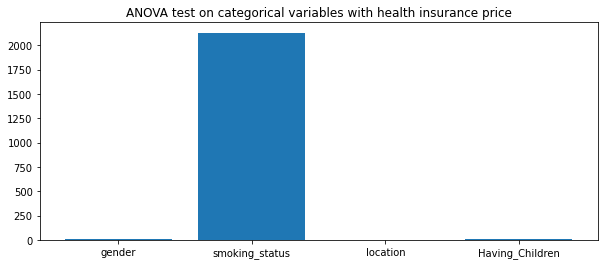

In [24]:
from scipy.stats import f_oneway

l = ['gender', 'smoking_status', 'location', 'Having_Children'] 

Y = hi['health_insurance_price'] 

male = Y.loc[hi['gender'] == 'male']
female = Y.loc[hi['gender'] == 'female']
f_gender, g_p = f_oneway(male, female)
print('Anova / F-test value, pvalue for %s : %.5f , %.5f' % (l[0], f_gender, g_p) )

no = Y.loc[hi['smoking_status'] == 'no']
yes = Y.loc[hi['smoking_status'] == 'yes']
f_smoke, s_p = f_oneway(no, yes)
print('Anova / F-test value, pvalue for %s : %.5f , %.5f' % (l[1], f_smoke, s_p) )

NE = Y.loc[hi['location'] == 'northeast']
NW = Y.loc[hi['location'] == 'northwest']
SE = Y.loc[hi['location'] == 'southeast']
SW = Y.loc[hi['location'] == 'southwest']
f_location, l_p = f_oneway(NE, NW, SE, SW)
print('Anova / F-test value, pvalue for %s : %.5f , %.5f' % (l[2], f_location, l_p) )

c_no = Y.loc[hi['Having_Children'] == 'No']
c_yes = Y.loc[hi['Having_Children'] == 'Yes']
f_child, c_p = f_oneway(c_no, c_yes)
print('Anova / F-test value, pvalue for %s : %.5f , %.5f' % (l[3], f_child, c_p) )

plt.figure(figsize = (10,4))
plt.title('ANOVA test on categorical variables with health insurance price')
plt.bar(['gender', 'smoking_status', 'location', 'Having_Children'], [f_gender, f_smoke, f_location, f_child])
plt.show()                                                         

#### Feature encoding

In [25]:
# Encoding the categorical variables and dropping their first column

#hi_2 = pd.get_dummies(hi,columns=['gender', 'smoking_status', 'location'], drop_first= True)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(drop= 'first', sparse=False)

q = onehot_encoder.fit_transform(X_cat)
X_onecat = pd.DataFrame(q, 
               columns= ['gender_male'	,'smoking_status_yes'	,
                         'location_northwest',	'location_southeast',	'location_southwest',
                         'Having_Children_yes'])

hi_2 = pd.concat([X_num, X_onecat.set_index(X_num.index)], axis= 1)
hi_2.head(5)

,age,BMI,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest,Having_Children_yes
1,18,33.770,1725.55230,1.0,0.0,0.0,1.0,0.0,1.0
2,28,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,1.0
3,33,22.705,21984.47061,1.0,0.0,1.0,0.0,0.0,0.0
4,32,28.880,3866.85520,1.0,0.0,1.0,0.0,0.0,0.0
5,31,25.740,3756.62160,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Selection - By filter method
With the help of statistical tests, the features that doesn't seemed to have much correlation with the target variable are dropped. 

In [26]:
# splitting the features and target
features = hi_2[['age','BMI', "smoking_status_yes", "Having_Children_yes"]]
X = features.values
y= hi_2['health_insurance_price']

In [27]:
# Splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
# performing scaling on features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

# Transforming the test set
X_test = sc.transform(X_test)

## Machine learning

### 1)Decision Tree regressor

Hyperparameter tuning - To avoid overfitting

GridSearchCV by default performs 5 - fold cross validation for different combinations of the given param_grid values

In [29]:
# importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
              'max_depth': [ 5, 6, 7],
              'splitter': ['best', 'random']} 
  
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_absolute_error',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# To print best score
print('The best score for neg_mean_absolute_error was found to be',grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=5, splitter=best;, score=-2883.403 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, splitter=best;, score=-2683.468 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, splitter=best;, score=-2177.391 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, splitter=best;, score=-2578.361 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, splitter=best;, score=-2662.662 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, splitter=random;, score=-3203.861 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, splitter=random;, score=-3012.456 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, splitter=random;, score=-2880.481 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, splitter=random;, score=-2729.030 total time=   0.0s
[CV 5/5] END

In [30]:
#print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'absolute_error', 'max_depth': 6, 'splitter': 'best'}
DecisionTreeRegressor(criterion='absolute_error', max_depth=6)


#### Training the decision tree regressor

In [31]:
# importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

regressor_1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=6, random_state= 1)

# Training the model
regressor_1.fit(X_train, y_train)

# Checking predictons on training set
y_train_pred_dt = regressor_1.predict(X_train) 

#### Testing the decision tree regressor

In [32]:
# Checking predictions on the test set 
y_test_pred_dt = regressor_1.predict(X_test)

### 2) RandomForestRegressor

Hyperparameter tuning for random forest regressor

In [33]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
              'n_estimators': [40, 45, 50],
              'max_depth': [3, 5, 6 ],
              'bootstrap' : [True],
              'oob_score' : [True] } 
  
grid = GridSearchCV(RandomForestRegressor(), param_grid, scoring='neg_mean_absolute_error',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# To print best score
print('The best score for neg_mean_absolute_error was found to be',grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=40, oob_score=True;, score=-2948.550 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=40, oob_score=True;, score=-2858.841 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=40, oob_score=True;, score=-2409.912 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=40, oob_score=True;, score=-2534.232 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=40, oob_score=True;, score=-2570.329 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=45, oob_score=True;, score=-2885.513 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=squared_error, max_depth=3, n_estimators=45, oob_score=True;, score=-2821.410 total

In [34]:
#print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 45, 'oob_score': True}
RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=45,
                      oob_score=True)


#### Training the random forest regressor

In [35]:
# importing decision tree regressor
from sklearn.ensemble import RandomForestRegressor

regressor_2 = RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators= 45, bootstrap= True,
                      oob_score=True, random_state= 1)
# Training the model
regressor_2.fit(X_train, y_train)

# Checking predictons on training set
y_train_pred_rf = regressor_2.predict(X_train) 

#### Testing the random forest regressor

In [36]:
# Checking predictions on the test set 
y_test_pred_rf = regressor_2.predict(X_test)

### 3) SVM Regressor

In [37]:
# Import svr
from sklearn.svm import SVR

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = { 'kernel' : ['poly'],  # epsilon - length of positive or negative margin
              'degree' : [3, 5, 7],
              'coef0' : [1] ,
              'C' : [7, 9 ,11]
              } 
  
grid = GridSearchCV(SVR(), param_grid, scoring='neg_mean_absolute_error',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# To print best score
print('The best score for neg_mean_absolute_error was found to be',grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=7, coef0=1, degree=3, kernel=poly;, score=-3859.523 total time=   0.0s
[CV 2/5] END C=7, coef0=1, degree=3, kernel=poly;, score=-3431.285 total time=   0.0s
[CV 3/5] END C=7, coef0=1, degree=3, kernel=poly;, score=-3010.960 total time=   0.0s
[CV 4/5] END C=7, coef0=1, degree=3, kernel=poly;, score=-3341.165 total time=   0.0s
[CV 5/5] END C=7, coef0=1, degree=3, kernel=poly;, score=-3700.921 total time=   0.0s
[CV 1/5] END C=7, coef0=1, degree=5, kernel=poly;, score=-2688.180 total time=   0.1s
[CV 2/5] END C=7, coef0=1, degree=5, kernel=poly;, score=-2487.793 total time=   0.1s
[CV 3/5] END C=7, coef0=1, degree=5, kernel=poly;, score=-2147.965 total time=   0.1s
[CV 4/5] END C=7, coef0=1, degree=5, kernel=poly;, score=-2319.833 total time=   0.1s
[CV 5/5] END C=7, coef0=1, degree=5, kernel=poly;, score=-2454.689 total time=   0.1s
[CV 1/5] END C=7, coef0=1, degree=7, kernel=poly;, score=-2601.077 total time=  

In [38]:
#print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 11, 'coef0': 1, 'degree': 7, 'kernel': 'poly'}
SVR(C=11, coef0=1, degree=7, kernel='poly')


#### Training the svm regressor

In [39]:
# importing SVM regressor
from sklearn.svm import SVR

regressor_3 = SVR(C= 11, coef0=1, degree=7, kernel='poly')
# Training the model
regressor_3.fit(X_train, y_train)

# Checking predictons on training set
y_train_pred_svm = regressor_3.predict(X_train) 

#### Testing the svm regressor

In [40]:
# Checking predictions on the test set 
y_test_pred_svm = regressor_3.predict(X_test)

### 4) SGDRegressor (Polynomial)

In [41]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

# Create a Pipeline object
sgd_pipeline = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid = {'poly__degree': [1, 2],
              'sgd__alpha': [0.1, 0.01], 
              'sgd__l1_ratio': [1, 0.5, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.03, 0.01]}


# Create a GridSearchCV object and perform hyperparameter tuning
sgd = GridSearchCV(sgd_pipeline, param_grid, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd.fit(X_train, y_train)

# Get the optimal hyperparameters
params_optimal_sgd = sgd.best_params_

print("Best Score (negative mean squared error): %f" % sgd.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score (negative mean squared error): -2979.744038
Optimal Hyperparameter Values:  {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__eta0': 0.03, 'sgd__l1_ratio': 1, 'sgd__max_iter': 1000}




In [42]:
# Training data: Make prediction 
y_train_pred_sgd = sgd.predict(X_train)

#### Checking assumptions of linear regression

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Checking Distribution of errors')

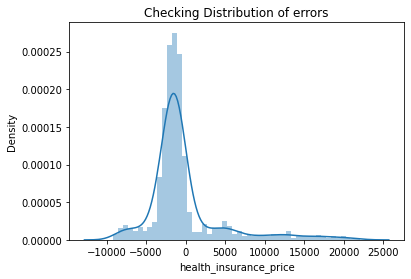

In [43]:
sns.distplot((y_train-y_train_pred_sgd),bins=50)
plt.title('Checking Distribution of errors')

In [44]:
residuals = y_train.values-y_train_pred_sgd
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -260.391584085219


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



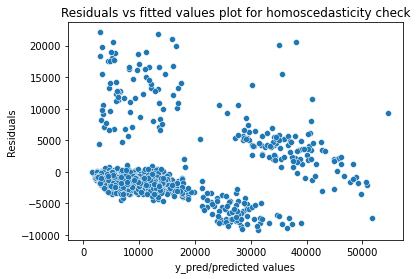

In [45]:
p = sns.scatterplot(y_train_pred_sgd, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [46]:
# Test data: Make prediction 
y_test_pred_sgd = sgd.predict(X_test)

## Comparision of the regression models

In [47]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('RMSE on training set, test set (DecisionTreeRegressor):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dt)),
                                                                 np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)),
                                                                 sep= ' ')

print('RMSE on training set, test set (RandomForestRegressor):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)),
                                                                np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)), 
                                                                sep= ' ')

print('RMSE on training set, test set (SVR):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_svm)),
                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_svm)),
                                             sep= ' ')

print('RMSE on training set, test set (SGDRegressor):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_sgd)),
                                                  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_sgd)),
                                                  sep= ' ')

RMSE on training set, test set (DecisionTreeRegressor): 4297.538678977602 4838.145638893016
RMSE on training set, test set (RandomForestRegressor): 4335.553798399824 4576.447753679875
RMSE on training set, test set (SVR): 4705.987962348541 5112.518892575513
RMSE on training set, test set (SGDRegressor): 4803.2764307103025 5182.987479847826


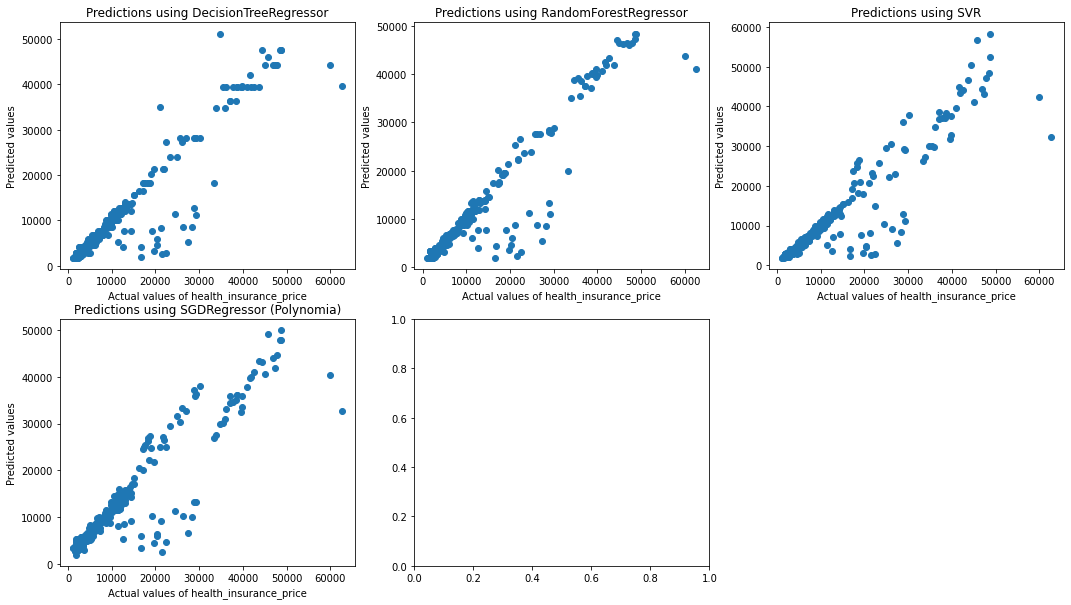

In [48]:
plt.figure(figsize = (18, 10))

# To plot scatterplot
plt.scatter(y_test, y_test_pred_dt)
plt.title('Predictions using DecisionTreeRegressor')
plt.xlabel('Actual values of health_insurance_price')
plt.ylabel('Predicted values')
plt.subplot(2,3,1 )

plt.scatter(y_test, y_test_pred_dt)
plt.title('Predictions using DecisionTreeRegressor')
plt.xlabel('Actual values of health_insurance_price')
plt.ylabel('Predicted values')
plt.subplot(2,3,2 )

plt.scatter(y_test, y_test_pred_rf)
plt.title('Predictions using RandomForestRegressor')
plt.xlabel('Actual values of health_insurance_price')
plt.ylabel('Predicted values')
plt.subplot(2,3,3)

plt.scatter(y_test, y_test_pred_svm)
plt.title('Predictions using SVR')
plt.xlabel('Actual values of health_insurance_price')
plt.ylabel('Predicted values')
plt.subplot(2,3,4)

plt.scatter(y_test, y_test_pred_sgd)
plt.title('Predictions using SGDRegressor (Polynomia)')
plt.xlabel('Actual values of health_insurance_price')
plt.ylabel('Predicted values')
plt.subplot(2,3,5)

plt.show()

### Conclusion:
**By comparing all the models, RandomForestRegressor seems to be performed well in the regression task.**